In [12]:
# Import necessary libraries
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import time as tm

from tvb.simulator.lab import *

In [14]:
# Load the default connectivity data
conn = connectivity.Connectivity.from_file()
conn.speed = np.array([np.inf])  # Setting conduction speed to infinity (no delay)
conn.cortical[:] = True  # Consider only cortical regions
conn.weights /= np.max(conn.weights)  # Normalize connectivity weights


2024-08-12 21:59:17,367 - WARNING - tvb.basic.readers - File 'hemispheres' not found in ZIP.


In [15]:
# Create a 2D Epileptor model instance.
epi = models.Epileptor2D(x0=np.array([-1]))

# Setup the integration scheme.
dt = 0.5  # Integration step [ms]
heundetint = integrators.HeunDeterministic(dt=dt)

# Configure the simulation
sim = simulator.Simulator(model=epi, 
                          connectivity=conn,
                          coupling=coupling.Difference(a=np.array([-0.2])), 
                          integrator=heundetint, 
                          monitors=(monitors.TemporalAverage(period=1.),))
sim.configure()

Starting simulation for 2D Epileptor...
2024-08-12 21:59:22,830 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration
Finished simulation in 1.4873239994049072 seconds.


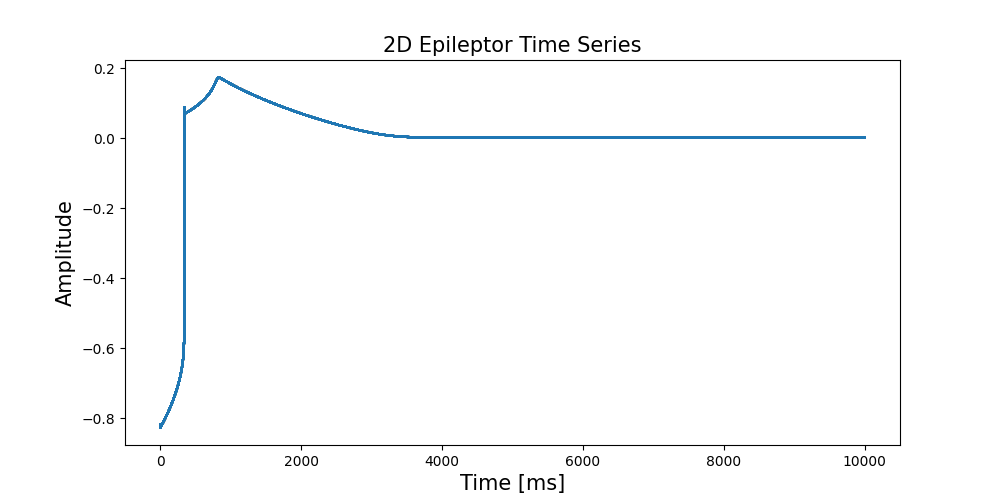

In [16]:
# Run the initial simulation
print("Starting simulation for 2D Epileptor...")
tic = tm.time()
(s, z), = sim.run(simulation_length=10000)
print("Finished simulation in", tm.time() - tic, "seconds.")

# Normalize the time series for plotting
z /= (np.max(z, 0) - np.min(z, 0))
z -= np.mean(z, 0)

# Plot the initial time series
plt.figure(figsize=(10, 5))
plt.plot(s, z[:, 0, :, 0], 'C0')
plt.title("2D Epileptor Time Series", fontsize=15)
plt.xlabel('Time [ms]', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.show()

In [17]:
# Define the stimulus parameters
stimulus_amplitude = 0.2
onset_times = np.arange(2000, 8000, 500)  # Experiment with different onset times
intervals = np.arange(100, 1000, 100)  # Experiment with different intervals

# Apply stimulus and observe the effects
results = []

In [30]:
for onset in onset_times:
    for interval in intervals:
        # Define stimulus with the required shape
        stimulus = np.zeros((6, 76, 76, 6, 1))  # Adjust the shape according to your model
        stimulus[0, :, :, 0, 0] = stimulus_amplitude  # Adjust indexing based on model requirements

        # Create a function to apply the stimulus at the desired time
        def apply_stimulus(step):
            if onset <= step < onset + interval:
                return stimulus
            return np.zeros_like(stimulus)
        
        # Apply stimulus function to the model
        sim.model.Iext = apply_stimulus
        
        print(f"Running simulation with stimulus onset={onset}ms, interval={interval}ms...")
        tic = tm.time()
        (s_stim, z_stim), = sim.run(simulation_length=10000)
        print("Finished simulation in", tm.time() - tic, "seconds.")
        
        # Normalize the time series for plotting
        z_stim = (z_stim - np.min(z_stim, 0)) / (np.max(z_stim, 0) - np.min(z_stim, 0))

        # Store the results for comparison
        results.append((onset, interval, s_stim, z_stim))

TraitTypeError: Attribute can't be set to an instance of <class 'function'>
  attribute tvb.simulator.models.epileptor.Epileptor.Iext = NArray(label=':math:`I_{ext}`', dtype=float64, default=array([3.1]), dim_names=(), ndim=None, required=True)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tvb/datatypes/surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


2024-08-13 16:17:06,464 - WARNING - tvb.basic.readers - File 'hemispheres' not found in ZIP.
2024-08-13 16:17:06,925 - INFO - tvb.simulator.monitors - Projection configured gain shape (588, 76)


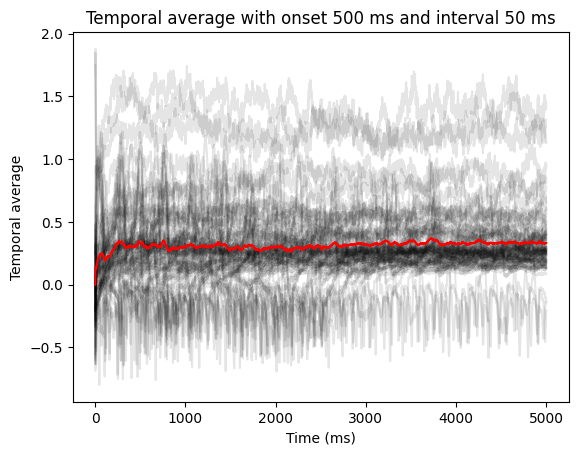

2024-08-13 16:17:33,019 - ERROR - tvb.simulator.simulator - Bad Simulator.integrator.noise.nsig shape: (6, 1, 1)


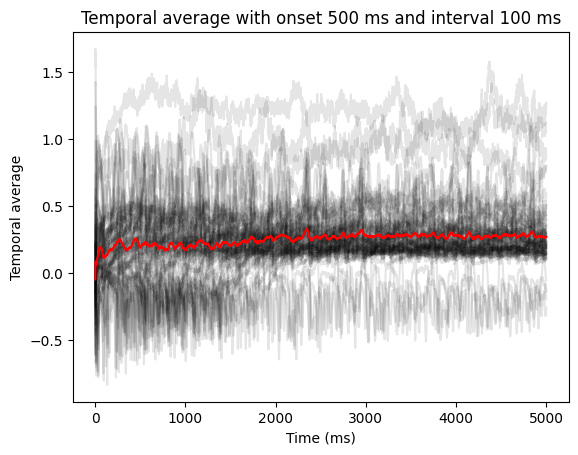

2024-08-13 16:17:59,691 - ERROR - tvb.simulator.simulator - Bad Simulator.integrator.noise.nsig shape: (6, 1, 1)


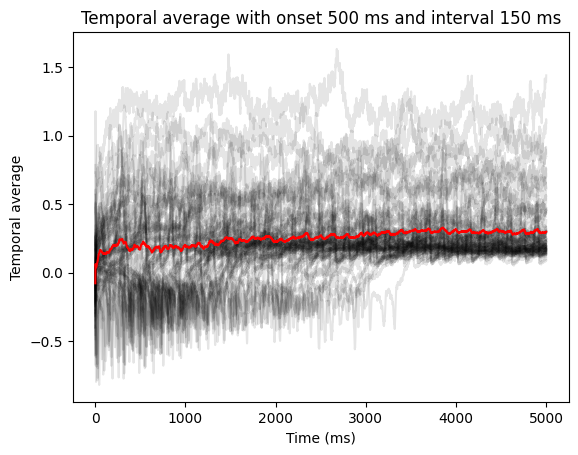

2024-08-13 16:18:26,579 - ERROR - tvb.simulator.simulator - Bad Simulator.integrator.noise.nsig shape: (6, 1, 1)


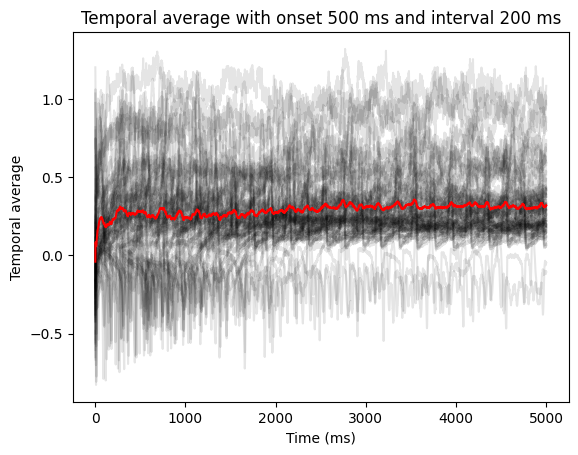

2024-08-13 16:18:52,017 - ERROR - tvb.simulator.simulator - Bad Simulator.integrator.noise.nsig shape: (6, 1, 1)


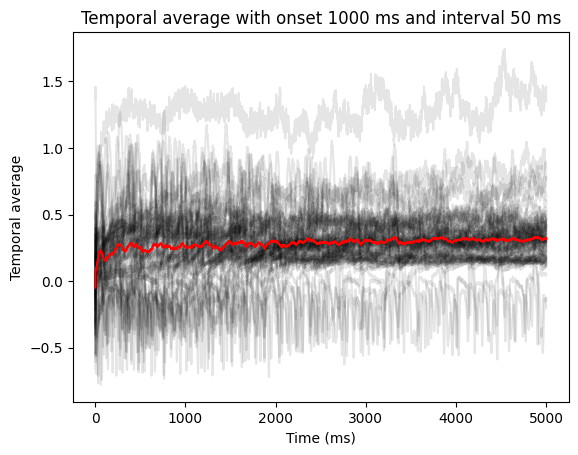

2024-08-13 16:19:18,171 - ERROR - tvb.simulator.simulator - Bad Simulator.integrator.noise.nsig shape: (6, 1, 1)


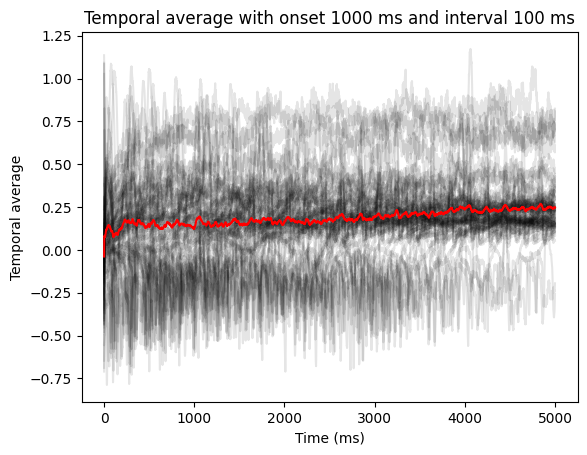

2024-08-13 16:19:48,685 - ERROR - tvb.simulator.simulator - Bad Simulator.integrator.noise.nsig shape: (6, 1, 1)


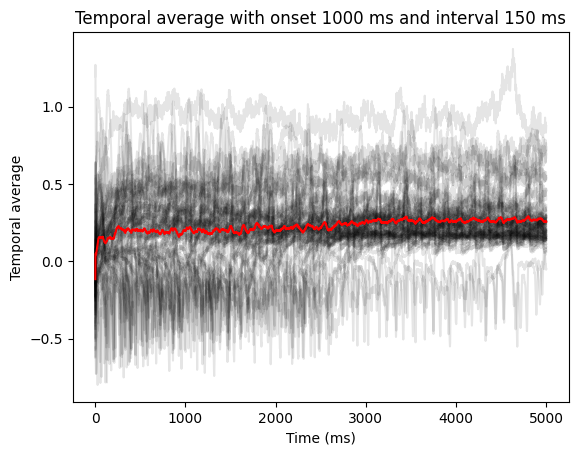

2024-08-13 16:20:14,931 - ERROR - tvb.simulator.simulator - Bad Simulator.integrator.noise.nsig shape: (6, 1, 1)


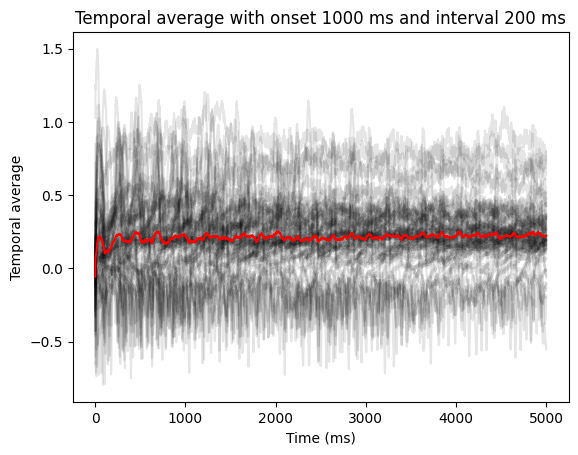

2024-08-13 16:20:40,609 - ERROR - tvb.simulator.simulator - Bad Simulator.integrator.noise.nsig shape: (6, 1, 1)


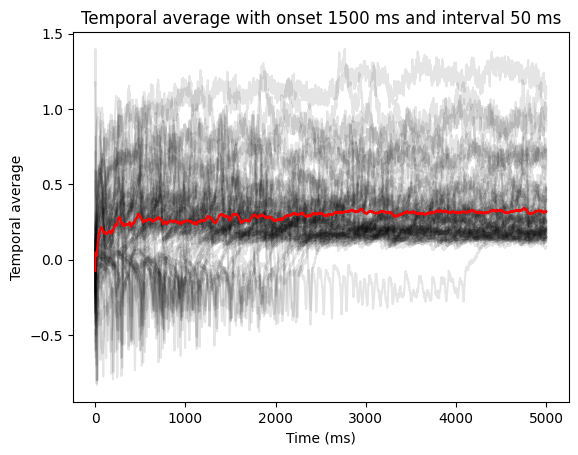

2024-08-13 16:21:07,402 - ERROR - tvb.simulator.simulator - Bad Simulator.integrator.noise.nsig shape: (6, 1, 1)


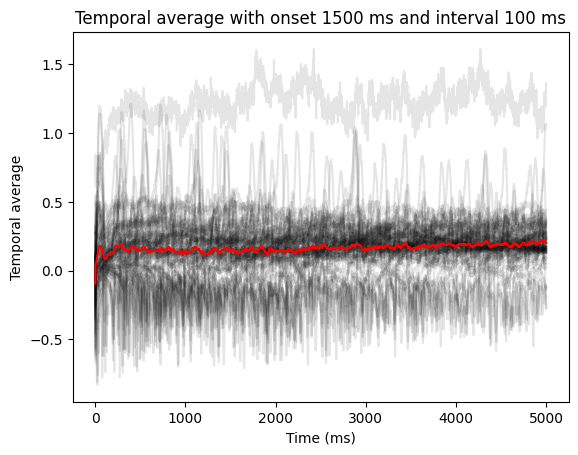

2024-08-13 16:21:35,257 - ERROR - tvb.simulator.simulator - Bad Simulator.integrator.noise.nsig shape: (6, 1, 1)


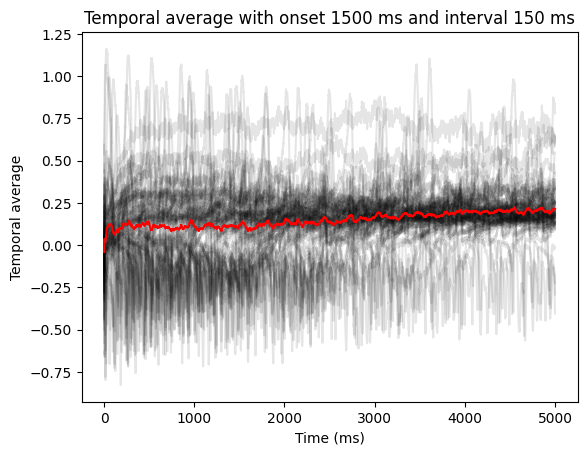

2024-08-13 16:22:06,013 - ERROR - tvb.simulator.simulator - Bad Simulator.integrator.noise.nsig shape: (6, 1, 1)


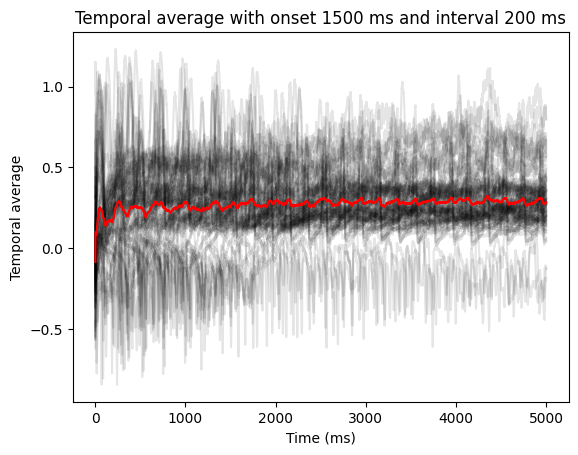

2024-08-13 16:22:36,940 - ERROR - tvb.simulator.simulator - Bad Simulator.integrator.noise.nsig shape: (6, 1, 1)


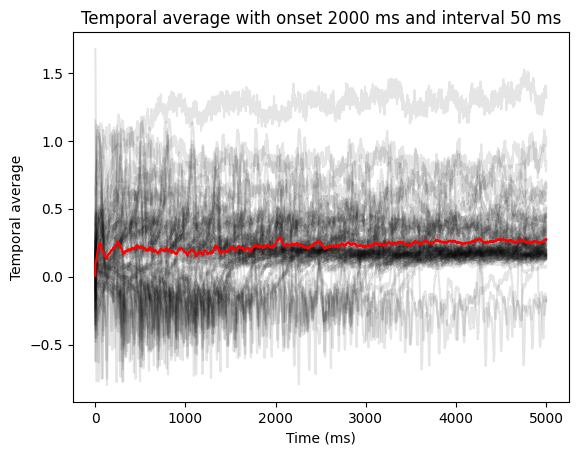

2024-08-13 16:23:08,772 - ERROR - tvb.simulator.simulator - Bad Simulator.integrator.noise.nsig shape: (6, 1, 1)


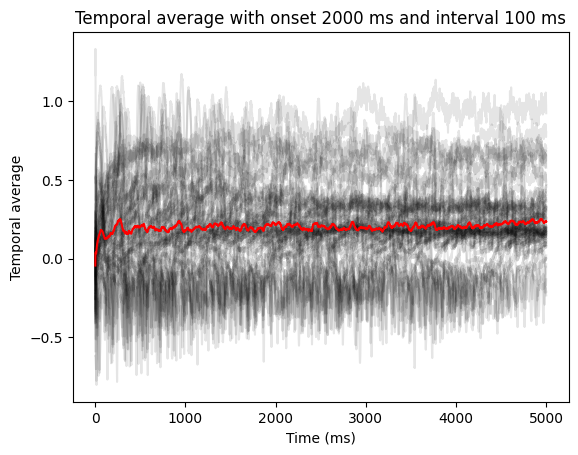

2024-08-13 16:23:48,627 - ERROR - tvb.simulator.simulator - Bad Simulator.integrator.noise.nsig shape: (6, 1, 1)


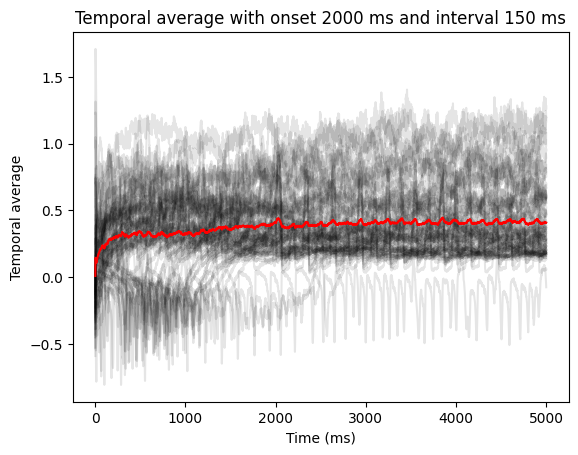

2024-08-13 16:24:30,255 - ERROR - tvb.simulator.simulator - Bad Simulator.integrator.noise.nsig shape: (6, 1, 1)


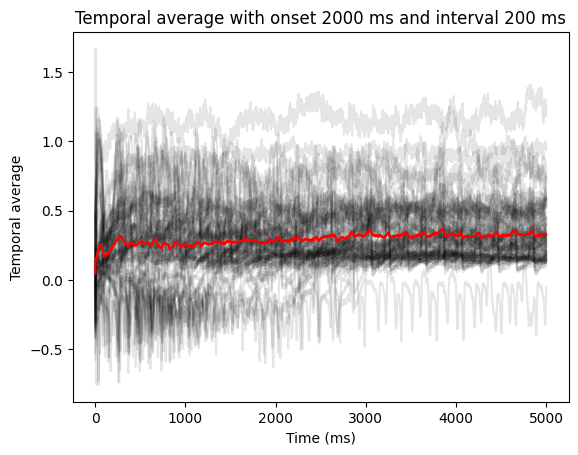

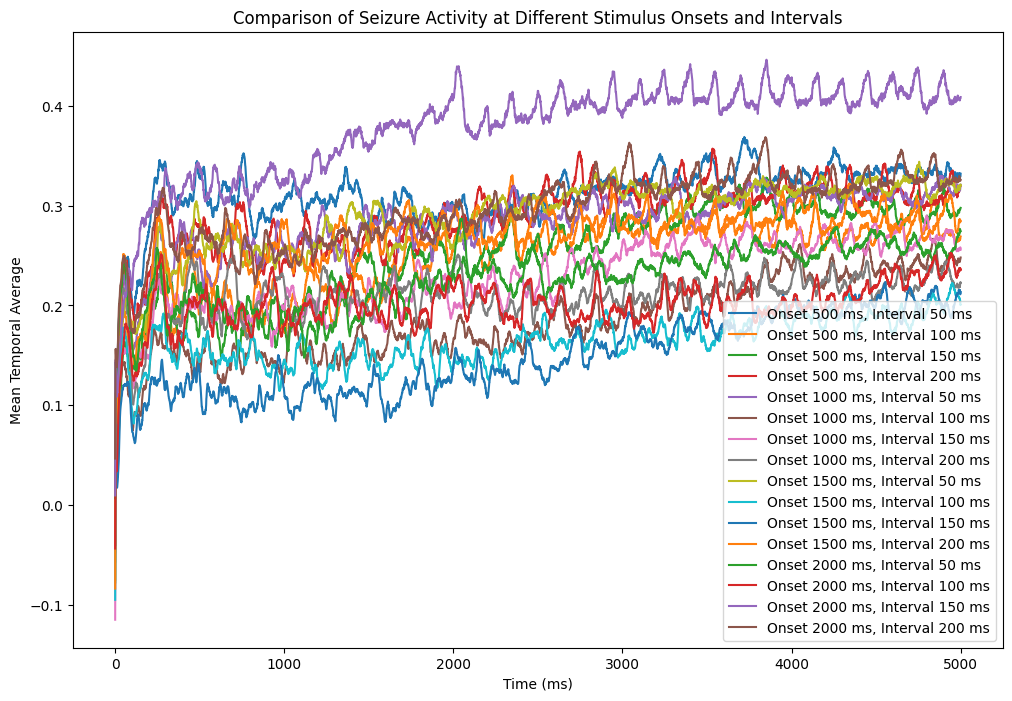

In [1]:
from tvb.simulator.lab import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the default connectivity data
conn = connectivity.Connectivity.from_file()

# Configure the spatial pattern of the stimulus (assuming 76 regions)
weighting = np.zeros((76,))  
# Choose some regions to stimulate (use multiple sites)
weighting[[14, 52, 11, 49]] = 0.1

# Define the Epileptor model
epileptors = models.Epileptor(Ks=np.array([-2]), r=np.array([0.0002]), tau=np.array([10]), tt=np.array([0.07]))
epileptors.x0 = -2.4*np.ones(len(conn.region_labels))
epileptors.x0[0] = -1.6  # Set one region to have a higher likelihood of seizure activity

# Set up the coupling and integrator
coupl = coupling.Difference(a=np.array([1.0]))
hiss = noise.Additive(nsig=np.array([0.001, 0.001, 0.0, 0.0001, 0.0001, 0.0]))
heunint = integrators.HeunStochastic(dt=0.05, noise=hiss)

# Set up the monitors
mon_tavg = monitors.TemporalAverage(period=1.0)
mon_SEEG = monitors.iEEG.from_file(sensors_fname='seeg_588.txt',
                                   projection_fname='/Users/mac/Downloads/tvb-root/tvb_data/projectionMatrix/projection_seeg_588_surface_16k.npy',
                                   period=1.0,
                                   variables_of_interest=np.array([0]))

# Define a function to run the simulation and apply stimuli
def run_simulation(stimulus_onset, stimulus_interval):
    # Temporal profile: Pulse Train
    eqn_t = equations.PulseTrain()
    eqn_t.parameters['onset'] = stimulus_onset
    eqn_t.parameters['T'] = stimulus_interval
    eqn_t.parameters['tau'] = 50.0

    # Combine spatial and temporal components into a StimuliRegion object
    stimulus = patterns.StimuliRegion(temporal=eqn_t, connectivity=conn, weight=weighting)

    # Configure the stimulus
    stimulus.configure_space()
    stimulus.configure_time(np.arange(0., 3e3, 2**-4))

    # Set up the simulator
    sim = simulator.Simulator(
        model=epileptors,
        connectivity=conn,
        coupling=coupl,
        integrator=heunint,
        monitors=[mon_tavg, mon_SEEG],
        stimulus=stimulus,
        simulation_length=5000  # 5 seconds for each simulation
    ).configure()

    # Run the simulation
    (ttavg, tavg), (tseeg, seeg) = sim.run()

    # Normalize the time series for better visualization
    tavg /= (np.max(tavg, 0) - np.min(tavg, 0))
    seeg /= (np.max(seeg, 0) - np.min(seeg, 0))
    seeg -= np.mean(seeg, 0)

    # Plot the results
    plt.figure()
    plt.plot(ttavg, tavg[:, 0, :, 0], 'k', alpha=0.1)
    plt.plot(ttavg, tavg[:, 0, :, 0].mean(axis=1), 'r', alpha=1)
    plt.title(f"Temporal average with onset {stimulus_onset} ms and interval {stimulus_interval} ms")
    plt.ylabel("Temporal average")
    plt.xlabel('Time (ms)')
    plt.show()

    return ttavg, tavg, tseeg, seeg

# Set up different onset times and intervals for the stimulus
stimulus_onsets = [500, 1000, 1500, 2000]  # in ms
stimulus_intervals = [50, 100, 150, 200]  # in ms

# Run simulations for each combination of stimulus onset and interval
results = []
for onset in stimulus_onsets:
    for interval in stimulus_intervals:
        ttavg, tavg, tseeg, seeg = run_simulation(stimulus_onset=onset, stimulus_interval=interval)
        results.append((onset, interval, ttavg, tavg, tseeg, seeg))

# Analyze results by plotting the mean temporal average for each combination
plt.figure(figsize=(12, 8))
for onset, interval, ttavg, tavg, tseeg, seeg in results:
    plt.plot(ttavg, tavg[:, 0, :, 0].mean(axis=1), label=f'Onset {onset} ms, Interval {interval} ms')
plt.legend()
plt.title('Comparison of Seizure Activity at Different Stimulus Onsets and Intervals')
plt.ylabel("Mean Temporal Average")
plt.xlabel('Time (ms)')
plt.show()
